# Estructura d'una Matriu

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Nivell 1

## Exercici 1

Crea un np.array d'una dimensió, que inclogui l'almenys 8 nombres sencers, data type int64. Mostra la dimensió i la forma de la matriu.

In [2]:
arr = np.random.randint(10, size=8)
arr

array([0, 9, 2, 9, 0, 3, 9, 6])

In [3]:
arr.ndim, arr.shape

(1, (8,))

## Exercici 2

De la matriu de l'exercici 1, calcula el valor mitjà dels valors introduïts i resta la mitjana resultant a cada un dels valors de la matriu.

In [4]:
mean = arr.mean()

In [5]:
arr - mean

array([-4.75,  4.25, -2.75,  4.25, -4.75, -1.75,  4.25,  1.25])

## Exercici 3

Crea una matriu bidimensional amb una forma de 5 x 5. Extreu el valor màxim de la matriu, i els valors màxims de cadascun dels seus eixos.

In [6]:
arr = np.random.randint(10, size=(5, 5))
arr

array([[3, 6, 6, 0, 2],
       [6, 2, 5, 2, 8],
       [7, 0, 0, 3, 2],
       [2, 2, 1, 7, 5],
       [7, 0, 0, 0, 5]])

In [7]:
arr.max(), arr.max(axis=0), arr.max(axis=1)

(8, array([7, 6, 6, 7, 8]), array([6, 8, 7, 7, 7]))

# Nivell 2

## Exercici 4

Mostreu-me amb exemples de diferents matrius, la regla fonamental de Broadcasting que diu : "les matrius es poden transmetre / broadcast si les seves dimensions coincideixen o si una de les matrius té una mida d'1".

Primer de tot mirarem l'exemple més senzill. Aquí els arrays tindran el mateix nombre de dimensions i per tant no caldrà fer cal broadcast. Així doncs, l'operació s'executarà element per element: el primer element del primer array amb el primer element del segon array, el segon element del primer array amb el segon element del segon array, etc.

In [8]:
a = np.arange(3)
b = np.array([5, 5, 5])
print('Dimensions: {}, {}'.format(a.ndim, b.ndim))
print('Operació: {} * {} = {}'.format(a, b, a * b))

Dimensions: 1, 1
Operació: [0 1 2] * [5 5 5] = [ 0  5 10]


Però també ens podem trobar en que el nombre de dimensions no coincideixi i calgui fer broadcast. El broadcast permet fer operacions binàries en arrays de diferents mides. Per exemple, podem afegir un scalar (array de dimensió 0) a un array d'una dimensió:

In [9]:
a = np.arange(3)
b = np.array(5)
print('Dimensions: {}, {}'.format(a.ndim, b.ndim))
print('Operació: {} * {} = {}'.format(a, b, a * b))

Dimensions: 1, 0
Operació: [0 1 2] * 5 = [ 0  5 10]


Per això, Numpy primer amplia la dimensió de l'array més petit i la iguala amb la del més gran afegint tants 1 com calgui. Després, si la forma dels dos arrays no coincideix, l'array amb forma igual a 1 en aquella dimensió és estirat per coincidir amb l'altra forma. Així doncs, en el nostre cas passarien les següents transformacions:

In [10]:
original = np.array(5)
broadcast_equal_dimensions = np.array([5])
broadcast_equal_shape = np.array([5, 5, 5])
print('Broadcast: {} -> {} -> {}'.format(original, broadcast_equal_dimensions, broadcast_equal_shape))
print('Dimension: {} -> {} -> {}'.format(original.ndim, broadcast_equal_dimensions.ndim, broadcast_equal_shape.ndim))
print('Shape:    {} -> {} -> {}'.format(original.shape, broadcast_equal_dimensions.shape, broadcast_equal_shape.shape))

Broadcast: 5 -> [5] -> [5 5 5]
Dimension: 0 -> 1 -> 1
Shape:    () -> (1,) -> (3,)


També podem veure el funcionament del broadcast en les següents operacions:

In [11]:
a = np.ones((2, 3))
b = np.arange(3)
print('{} * {} = {}'.format(a, b, str(a + b).replace('\n', '\n\t\t\t ')))

[[1. 1. 1.]
 [1. 1. 1.]] * [0 1 2] = [[1. 2. 3.]
			  [1. 2. 3.]]


In [12]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print('{} * {} = {}'.format(a, b, str(a + b).replace('\n', '\n\t\t  ')))

[[0]
 [1]
 [2]] * [0 1 2] = [[0 1 2]
		   [1 2 3]
		   [2 3 4]]


## Exercici 5

Utilitza la Indexació per extreure els valors d'una columna i una fila de la matriu, i suma els seus valors.

In [13]:
arr = np.arange(1, 10).reshape(3,3)
row = arr[0]
col = arr[:,1]
print('{} + {} = {}'.format(row, col, row + col))

[1 2 3] + [2 5 8] = [ 3  7 11]


## Exercici 6

Mask la matriu anterior, realitzeu un càlcul booleà vectoritzat, agafant cada element i comprovant si es divideix uniformement per quatre.

In [14]:
mask = [i % 4 == 0 for i in arr]

## Exercici 7

A continuació, utilitzeu aquesta màscara per indexar a la matriu de números original. Això fa que la matriu perdi la seva forma original, reduint-la a una dimensió, però encara obteniu les dades que esteu cercant.

In [15]:
arr_ma = ma.masked_array(arr, mask=mask)
arr_ma

masked_array(
  data=[[1, 2, 3],
        [--, 5, 6],
        [7, --, 9]],
  mask=[[False, False, False],
        [ True, False, False],
        [False,  True, False]],
  fill_value=999999)

# Nivell 3

Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. adoneu-vos que les imatges RGB (Red, Green, Blue) són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), una per cada color de nombres enters int8, manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat.

## Exercici 8

Mostreu-me a veure que passa quan eliminem el canal Vermell, Verd o Blau. Hauries d'utilitzar la indexació per seleccionar el canal que voleu anul·lar.

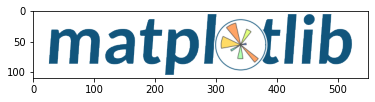

In [16]:
img = mpimg.imread('matplotlib_logo.png')
plt.imshow(img)

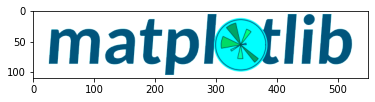

In [17]:
img_wo_red = np.copy(img)
img_wo_red[:,:,0]=0
plt.imshow(img_wo_red)

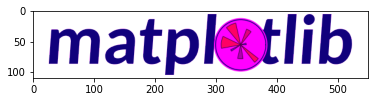

In [18]:
img_wo_green = np.copy(img)
img_wo_green[:,:,1]=0
plt.imshow(img_wo_green)

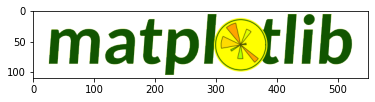

In [19]:
img_wo_blue = np.copy(img)
img_wo_blue[:,:,2]=0
plt.imshow(img_wo_blue)

Utilitzar el mètode, mpimg.imsave () de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.

In [20]:
mpimg.imsave('matplotlib_logo_without_red.png', img_wo_red)
mpimg.imsave('matplotlib_logo_without_green.png', img_wo_green)
mpimg.imsave('matplotlib_logo_without_blue.png', img_wo_blue)